# GEQIE FRQI Example

This is the example notebook that presents how to use GEQIE framework for encoding an image into its quantum representation using FRQI method [(Le et al., 2011)](https://link.springer.com/article/10.1007/s11128-010-0177-y). 

## Setup

### Imports

In [3]:
import numpy as np
from PIL import Image, ImageOps

import matplotlib.pyplot as plt

In [4]:
import geqie
from geqie.encodings import frqi

## Encoding

### Opening the image

Opening the test image and normalizing its pixel values to $[0.0, 1.0]$.

In [5]:
image = Image.open("../../assets/test_images/grayscale/test_image.png")
image = ImageOps.grayscale(image)
image = np.asarray(image)
image

array([[255, 192],
       [128,  64]], dtype=uint8)

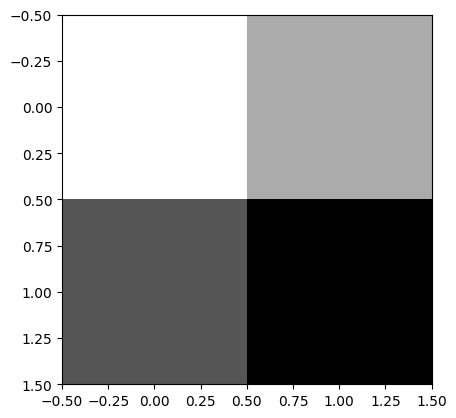

In [6]:
plt.imshow(image, cmap="gray")

### Encoding using unitary gate

In [7]:
circuit = geqie.encode(frqi.init_function, frqi.data_function, frqi.map_function, image)
circuit.draw(output='text')

┌──────────────────────────────────────┐┌──────────┐ ░ ┌─┐      
   q_0: ┤0                                     ├┤0         ├─░─┤M├──────
        │                                      ││          │ ░ └╥┘┌─┐   
   q_1: ┤1 Initialize(0.5,0,0.5,0,0.5,0,0.5,0) ├┤1 Unitary ├─░──╫─┤M├───
        │                                      ││          │ ░  ║ └╥┘┌─┐
   q_2: ┤2                                     ├┤2         ├─░──╫──╫─┤M├
        └──────────────────────────────────────┘└──────────┘ ░  ║  ║ └╥┘
meas: 3/════════════════════════════════════════════════════════╩══╩══╩═
                                                                0  1  2

### Simulating the circuit

The stemplot represents the number of results for each possible quantum state of the system with decimal basis where, e.g., $\ket{13} \equiv \ket{01101}$.

{'010': 46,
 '001': 253,
 '011': 213,
 '110': 225,
 '101': 131,
 '100': 113,
 '111': 43}

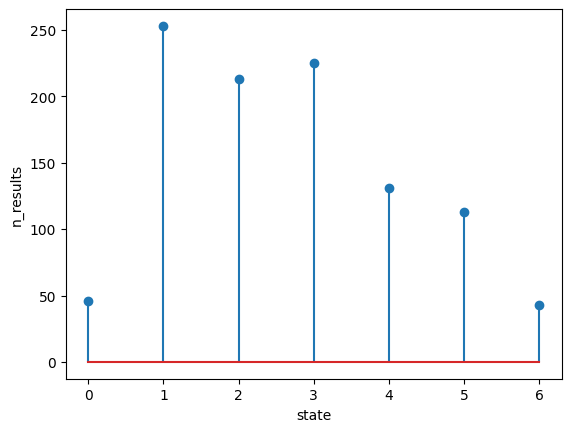

In [11]:
result = geqie.simulate(circuit, 1024)
plt.stem(result.values())
plt.xlabel("state")
plt.ylabel("n_results")
result

## Retrieving the image

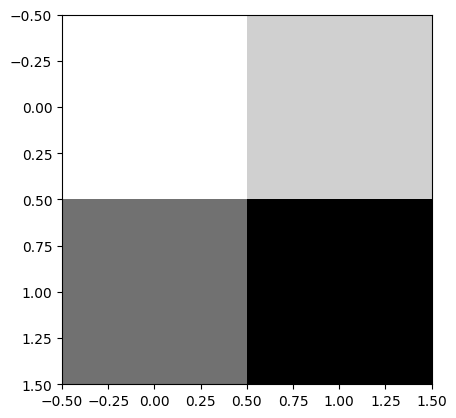

In [9]:
retrieved_image = frqi.retrieve_function(result)
plt.imshow(retrieved_image, cmap="gray")
plt.show()

The color is encoded by the last qubit $c$, hence to retrieve the image one has to calculate the average number of resulting $c = \ket{1}$ for each pixel.

### Reconstructed image

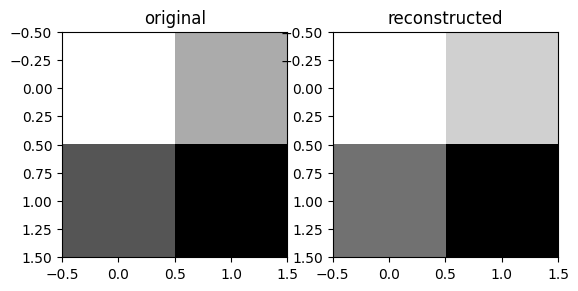

In [10]:
f = plt.figure()
gs = f.add_gridspec(1, 2)

ax = f.add_subplot(gs[0, 0])
ax.set_title("original")
ax.imshow(image, cmap="gray")

ax = f.add_subplot(gs[0, 1])
ax.set_title("reconstructed")
ax.imshow(retrieved_image, cmap="gray")